In [4]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

#Table.interactive_plots()
Table.static_plots()

## Sample size & its relation to distributions

In [7]:
nba_salaries = Table.read_table("nba_salaries.csv")
nba_salaries

PLAYER,POSITION,TEAM,'15-'16 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


The average salary in millions of dollars for NBA players is 5.074814482014388
417 players are shown in this distribution.


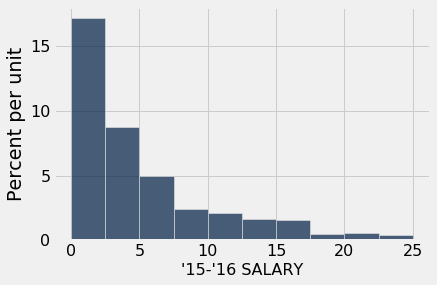

In [8]:
## This is population level data of all of the players in the NBA
# Let's learn about the true info:
def nba_dist(tbl):
    pop_mean = np.mean(tbl.column("'15-'16 SALARY"))
    print("The average salary in millions of dollars for NBA players is " + str(pop_mean))
    print(str(tbl.num_rows) + " players are shown in this distribution.")
    tbl.hist(3, bins = np.arange(0, 26, 2.5))

nba_dist(nba_salaries)

The average salary in millions of dollars for NBA players is 5.066340319999999
400 players are shown in this distribution.


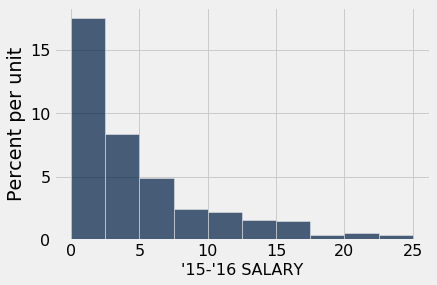

In [19]:
sample = nba_salaries.sample(400, with_replacement = False)

nba_dist(sample)

In [ ]:
## In general: as n approaches N, the empirical/sampled distribution
# greater resembles the theoretical/probability distribution

## Coin flipping - simulations

In [20]:
coin = Table().with_column("Side", make_array(0, 1))
coin #Let's treat 1 as a "Heads" and 0 as a "Tails"

Side
0
1


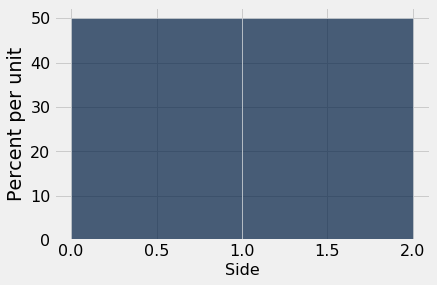

In [21]:
## The probability distribution: both heads and tails are equally likely, so...
coin.hist(0, bins = np.arange(1+2))

In [22]:
def sample_hist(sample_size):
    """Flip a coin sample_size times and create a histogram showing the numbnr """
    coin.sample(sample_size).hist(0, bins=np.arange(1+2))
    ## Why do I not need to return anything in this function? 

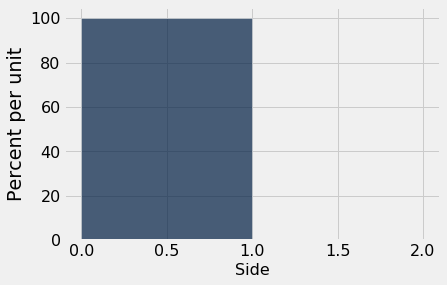

In [26]:
## Flip a coin once and see how many heads/tails we get.
sample_hist(1)

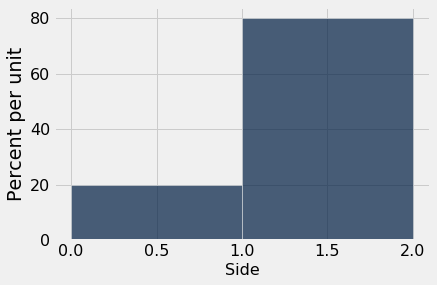

In [30]:
sample_hist(5)

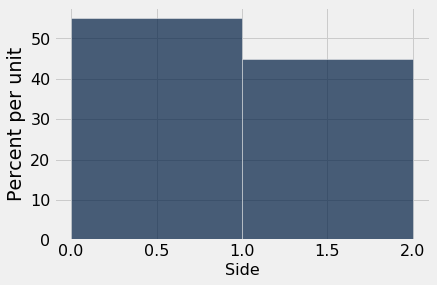

In [31]:
sample_hist(20)

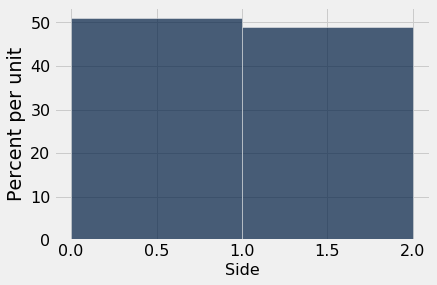

In [32]:
sample_hist(100)

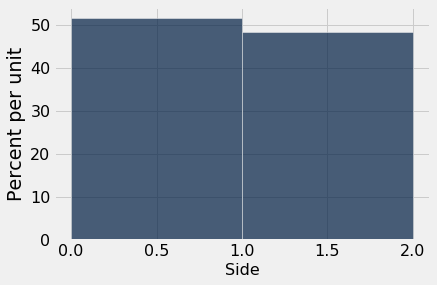

In [33]:
sample_hist(1000)

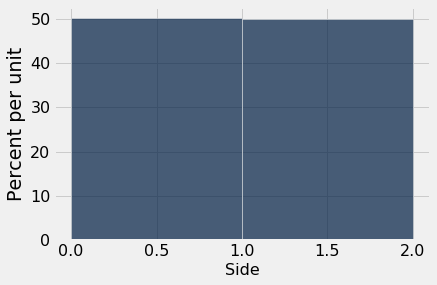

In [34]:
sample_hist(1000000)

## Many experiments - the law of large numbers

In [38]:
coin.sample(10, with_replacement = True)

Side
0
0
0
1
0
1
1
0
1
0


In [45]:
## Let's continue using the coin example.
# Make sure you differentiate the sample size and the number of trials/experiments
# In this case, sample size = num_coins and trials = num_flips

def coin_experiment(num_coins, num_flips):
    results = make_array()
    for i in np.arange(num_flips):
        prop_heads = np.mean(coin.sample(num_coins, with_replacement = True).column(0))
        results = np.append(results, prop_heads)
    Table().with_column("Proportion Heads", results).hist(0, bins = np.arange(0.25, 0.8, 0.05))
    #return Table().with_column("Proportion Heads", results)

So why do we want to use computation in this case? For example, imagine we are flipping a coin 5 times and measuring the proportion of heads.

If we want to know the probability distribution, we need to know all the ways to get every combination to get each proportion of heads.

i.e.: just for 1 heads, HTTTT, THTTT, TTHTT, TTTHT, TTTTH; 2 heads, HHTTT, THHTT, TTHHT, TTTHH, HTTTH, ... (to list a few) 

This isn't too bad for small numbers of flips, but it gets very difficult when it's not this simple and when there's many flips. Simulation lets us approximate this instead!

The issue is that there is random chance involved, so although we know a coin should be 50/50, there is some variation when we do an experiment.

Proportion Heads
0.46
0.48
0.56
0.48
0.4
0.42
0.58
0.38
0.48
0.42


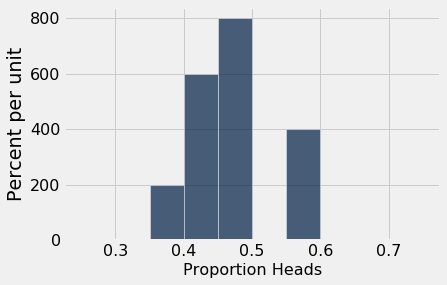

In [44]:
coin_experiment(50, 10)

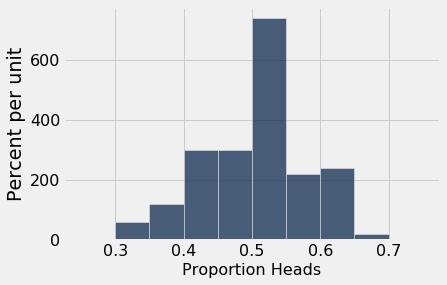

In [46]:
coin_experiment(50, 100)

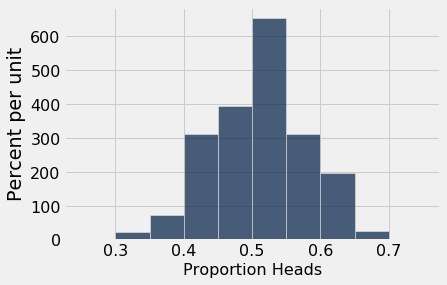

In [47]:
coin_experiment(50, 1000)

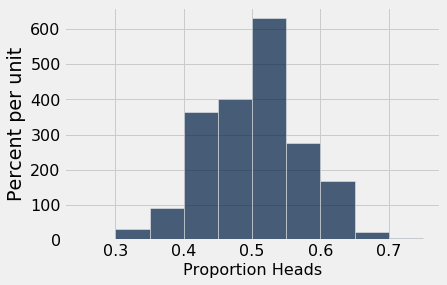

In [48]:
coin_experiment(50, 10000)

## Mendelian genetics

In [52]:
proportions_in_many_experiments(10, 20)

Sample size,Proportion pink
10,0.9
10,0.8
10,0.9
10,0.9
10,1
10,0.8
10,0.8
10,0.8
10,0.9
10,0.8


In [53]:
flowers = Table().with_columns("Color", make_array("Pink", "Pink", "Pink", "White"))

def proportion_in_one_experiment(sample_size):
    return flowers.sample(sample_size).where("Color", are.equal_to("Pink")).num_rows / sample_size

def proportions_in_many_experiments(sample_size, num_experiments):
    sizes = Table().with_columns("Sample size", np.repeat(sample_size, num_experiments))
    experiments = sizes.with_columns("Proportion pink", sizes.apply(proportion_in_one_experiment, "Sample size"))
    return experiments

def proportions_hist(sample_size, num_experiments):
    experiments = proportions_in_many_experiments(sample_size, num_experiments)
    bin_width = min(.1, max(.005, 4 / sample_size))
    experiments.hist("Proportion pink", bins=np.arange(0, 1+2*bin_width, bin_width))

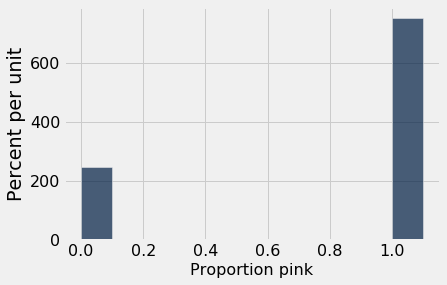

In [54]:
## How does sample size play a role in changing these graphs?
# the Law of Large Numbers in this case works because we have 10,000 trials
proportions_hist(1, 10000)
# Sample size = 1
# Proportion = 1 if the plant is pink
# Proportion = 0 if the plant is white

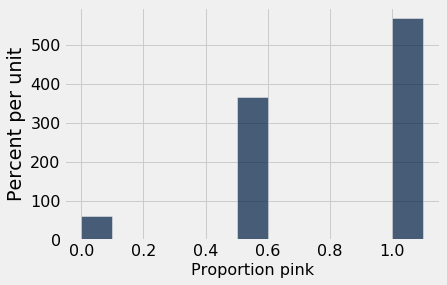

In [55]:
proportions_hist(2, 10000)
#0, 0.5, 1
# If sample size is 2,
# 2 pinks: 1
# 1 pink + 1 white: 0.5
# 2 whites: 0 

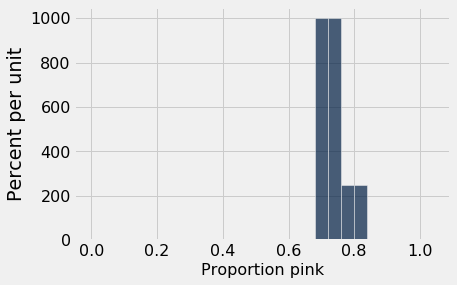

In [59]:
proportions_hist(100, 10)


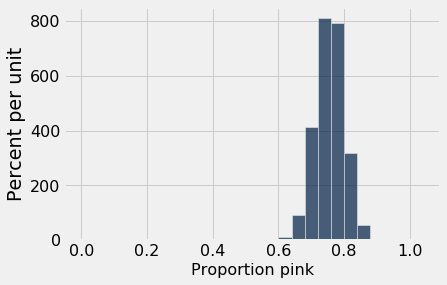

In [58]:
proportions_hist(100, 10000)

In [61]:
 proportions_in_many_experiments(100, 10000)

Sample size,Proportion pink
100,0.7
100,0.76
100,0.8
100,0.75
100,0.75
100,0.73
100,0.72
100,0.82
100,0.79
100,0.71


In [ ]:
# I'm flipping a coin 10 times; 10000 times
# on average, 5 heads
# 9 heads?? 
5+5+5+5+5+5+5+5+5+5+6+5+4+5+5+...+9
5+5+5+5+9
